# Avocado Project

## Avocado is a fruit consumed by people heavily in the United States. 
![avocado](https://i.makeagif.com/media/6-09-2014/aq_zLv.gif)

### Millennials are known to LOVE Avocado Toast. It is also well known that all Millennials live in their parents' basements.Clearly, they are not buying a house because they are buying too much avocado toast! But there may be hope...Millennials can find a city with cheap fruits, and they can live out the American Millennium Dream.

# Problem Definition

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold

### The dataset can be seen in two angles to find the average price and find the region.

### Task: One of Regression and other of Classification

### Let's first begin with Regression model and then will build Classification model
![price](https://blogs.sap.com/wp-content/uploads/2020/03/avocado-prices-prediction.jpg)

# Importing Libraries

In [405]:
# Import data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools


# preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer


#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error

from imblearn.over_sampling import SMOTE


# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#configure
%matplotlib inline  

# Dataset Collection and Information

In [406]:
# Read the dataset

df= pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Looking at the dataset at an early stage, we can see that "Unnamed" and"XLarge Bags" are of no use, later we will drop them


# Exploratory Data Analysis

In [407]:
# No. of Rows and Columns

df.shape

(18249, 14)

#### Dataset has 18249 rows and 14 columns.

In [408]:
# This will give Index, Datatype and Memory information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Yay! we don't have any missing values.
#### Column - Date is object type and has date type of data .
#### Column - AveragePrice, Total Volume, 4046, 4225, 4770,Total Bags, Small Bags, Large Bags, XLarge Bags are float type and continuous data.
#### Column - type, year and region are object type and  categorical data.



In [409]:
# stats of the dataset
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### From the above description it is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

#### A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.

In [410]:
#Checking for unique elements in each of the columns
df.nunique() 

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [411]:
# check for duplicate data

df.duplicated().sum()

0

#### Dataset has no duplicate data

In [412]:
#Checking null values in the dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

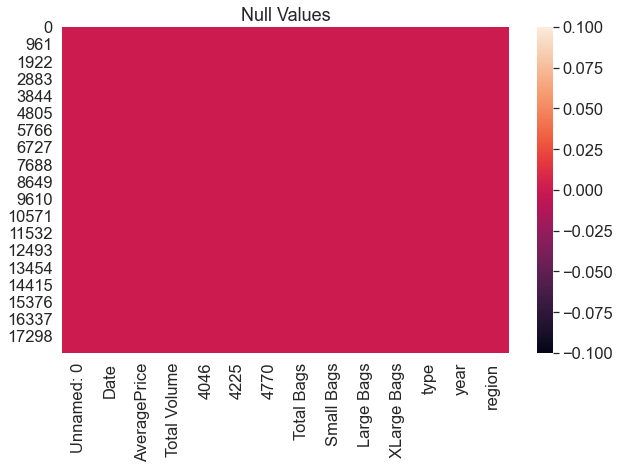

In [413]:
#Visualizeing null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

#### It confirms that, I don't have any Missing Values in my Dataset.

In [414]:
#Checking unique values of target column
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

#### Above are the unique value count of target column.

In [415]:
#Checking for empty observations
df.loc[df['AveragePrice'] == " "]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region


#### So I don't have any empty observations in my target column.

In [416]:
#Checking value counts of target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

# Feature Engineering:

In [417]:
# This will print the names of all columns
df.columns  

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [418]:
# renaming column names into meaningful names
df = df.rename(columns={'4046':'PLU_4046','4225':'PLU_4225','4770':'PLU_4770'})
df

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [419]:
# convert the type of Date feature from obj to datetime type

df['Date'] = pd.to_datetime(df['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [420]:
# removing unnecessary column
df = df.drop(['Unnamed: 0'],axis = 1)
df.head(10)

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [421]:
df['Date']=pd.to_datetime(df['Date']) #creating datetime type dataframe
df['Day']=df['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe
df['Month']=df['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe
df

,Date,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [422]:
#Dropping 'Date' column since it doesn't contribute to building a good model for predicting the target variable values.
df.drop(columns = ['Date'],inplace = True)
df

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


# Data Visualization

### Univariate Analysis:

In [423]:
continuous_cols = ['AveragePrice', 'Total Volume','PLU_4046','PLU_4225','PLU_4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

#### This are two types of columns in the dataset.i.e.,Continuous columns and Categorical columns.

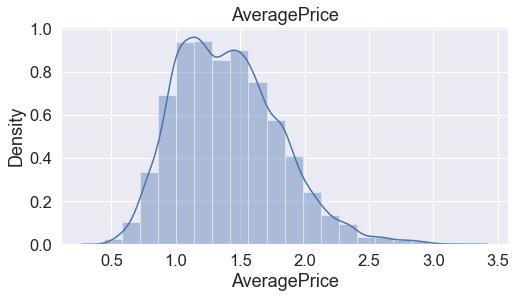

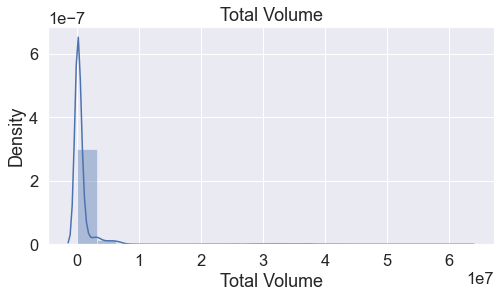

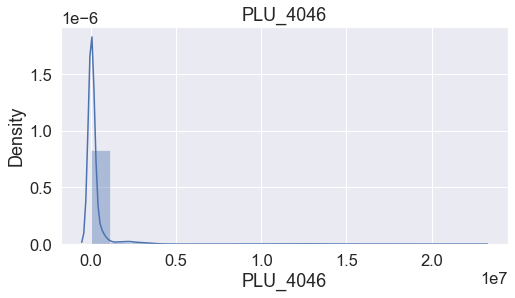

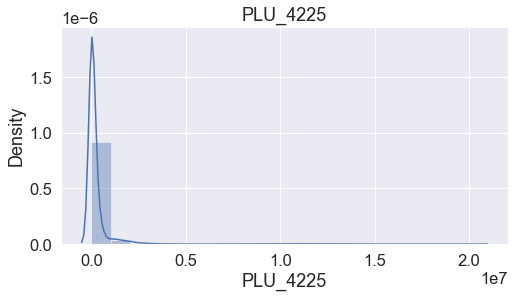

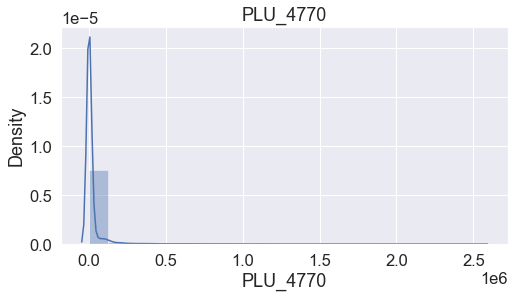

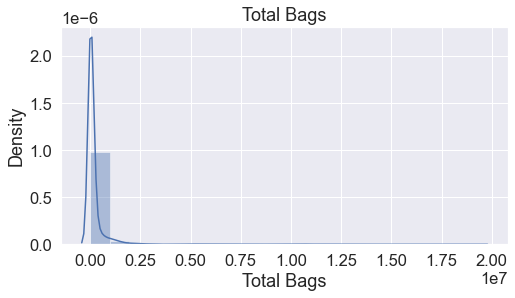

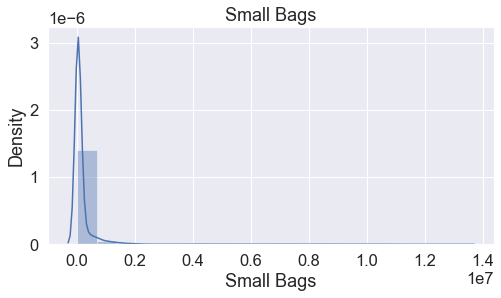

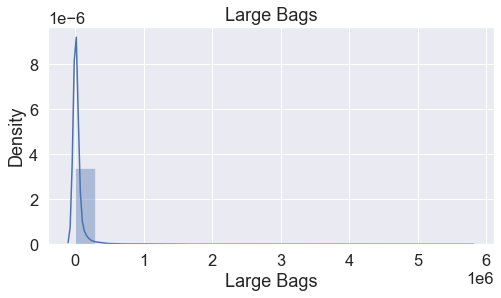

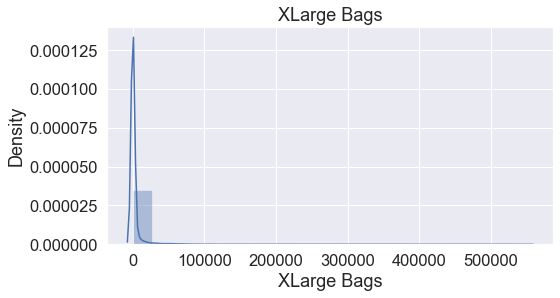

In [424]:
for i in df[continuous_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

#### we can see that the data in Continous Columns are skewed.

In [425]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

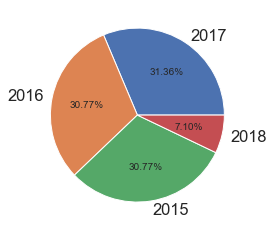

In [426]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%')
plt.show()

#### Almost all the years had same percentage around 30-31% except 2018, which shows very low percentage around 7%

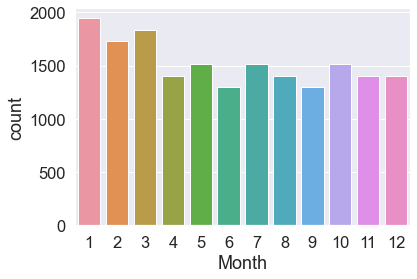

In [427]:
#Count plot for Month
sns.countplot(df['Month']);


#### January, February and March shows maximum number of count in compare to other months.

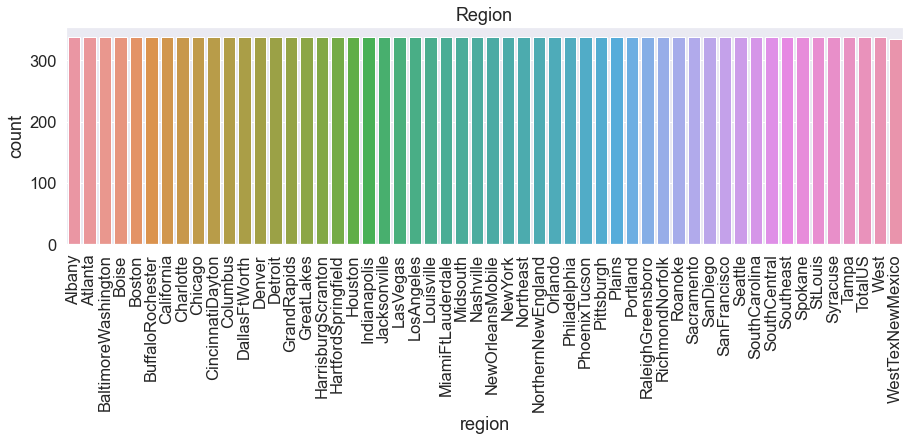

In [428]:
#region

plt.figure(figsize=(15,4))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

#### In all the regions the count is almost same which means there is equal importance in the regions for avacado.

#### Bivariate Analysis

<p><b>Organic vs Conventional :</b> The main difference between organic and conventional food products is the chemicals involved during production and processing. Interest in organic food products has grown steadily in recent years with the emergence of new healthy super fruits. Let's see if this is also the case with our dataset.</p>

In [429]:
Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])


#### Just over 2% of our dataset is organic. So looks like Conventional is in more demand. Now, let's look at the average price distribution

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

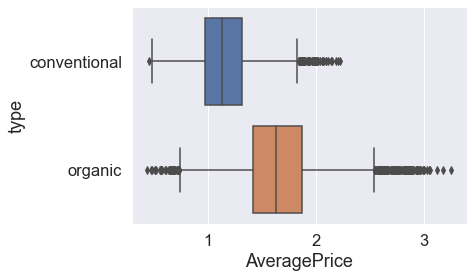

In [430]:
sns.boxplot(y="type", x="AveragePrice", data=df)

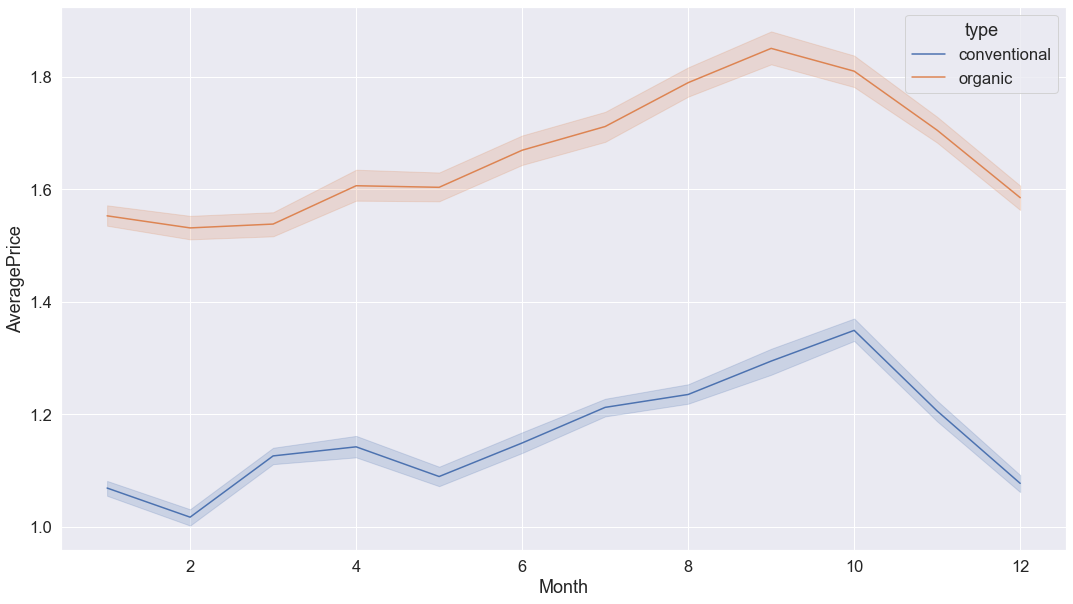

In [431]:
# Create a plot
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

#### Organic avocados are more expensive. This is obvious because they are more expensive to grow and we all like natural products and are willing to pay a higher price for them. But it's likely that the price of avocado doesn't just depend on the type. Let's look at the price of avocado in different regions in different years. Let's start with organic avocados.

### Avocado prices

<AxesSubplot:xlabel='AveragePrice'>

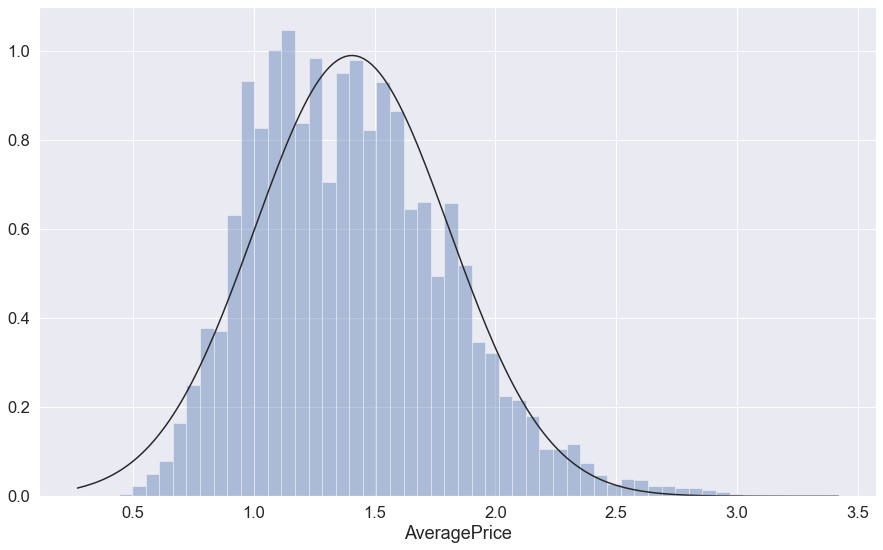

In [432]:
#price distribution of our favorite avocado!

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

#### Average Price distribution shows that for most cases price of avocado is between 1.1, 1.4

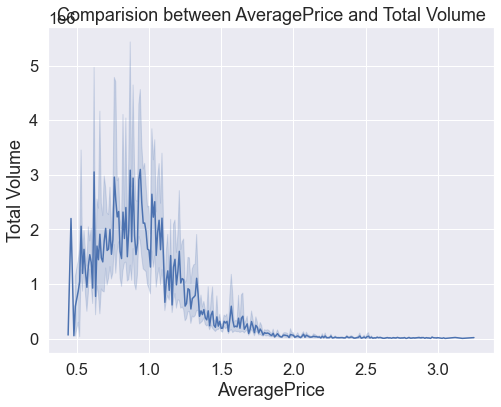

In [433]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between AveragePrice and Total Volume')
sns.lineplot(df['AveragePrice'],df['Total Volume']);

Text(0, 0.5, 'Average Price')

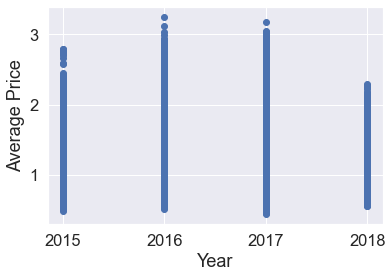

In [434]:
# Scatter Plot b/w Average Price and Year

plt.scatter(df['year'], df['AveragePrice'])
plt.xlabel('Year')
plt.ylabel('Average Price')

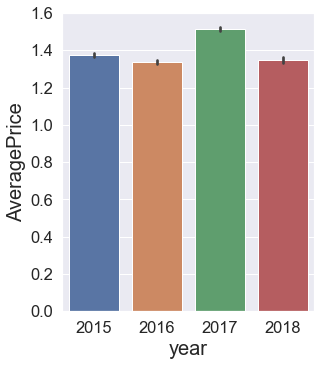

In [435]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = df['AveragePrice']
X = df[['year']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

#### We can observe that there was a spike in average price in the year 2017

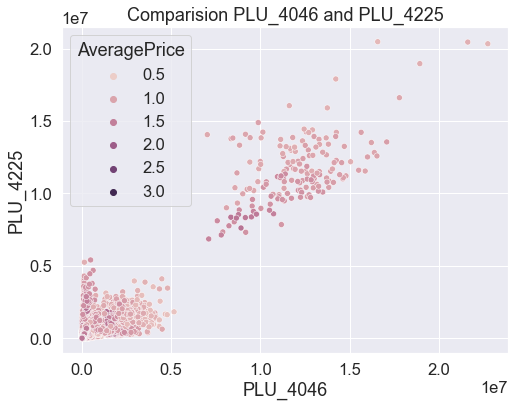

In [436]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision PLU_4046 and PLU_4225')
sns.scatterplot(df['PLU_4046'],df['PLU_4225'],hue=df["AveragePrice"]);

#### The points are dense in 0 to 0.5 for both 4046 and 4225 PLU, which means these both has less AveragePrice count.

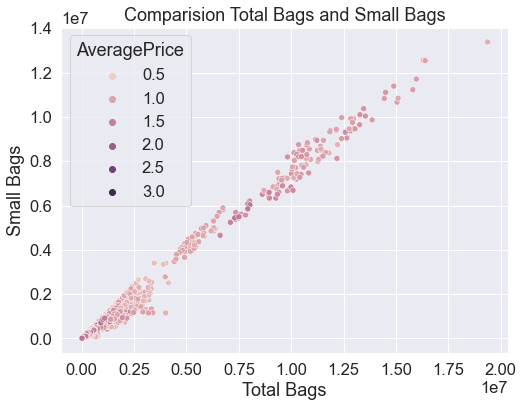

In [437]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["AveragePrice"]);

####  We can observe a linear distribution of Total bags and Small bags.

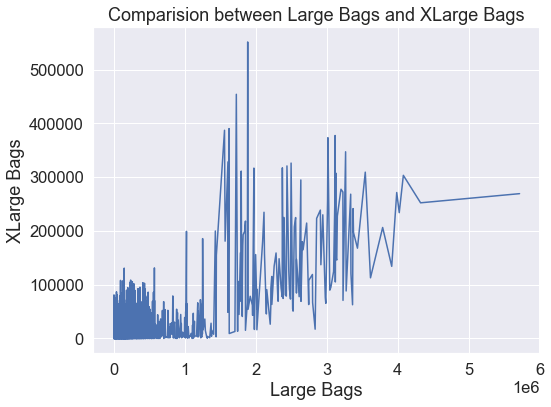

In [438]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Large Bags and XLarge Bags')
sns.lineplot(df['Large Bags'],df['XLarge Bags']);

#### We can observe some extreme outliers here.So we will deal with it.

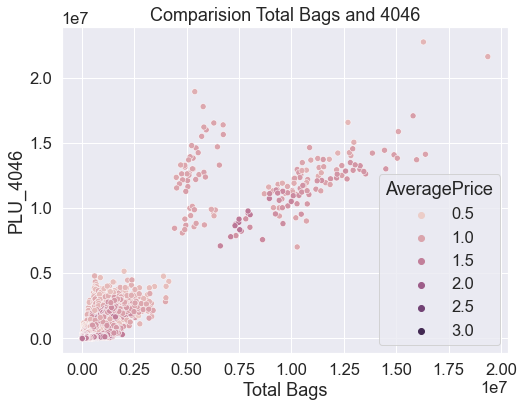

In [439]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and 4046')
sns.scatterplot(df['Total Bags'],df['PLU_4046'],hue=df["AveragePrice"]);

#### Above plot says that the count is more with less Total Bags and 4046 PLU.

### Now lets plot Average price distribution based on region

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

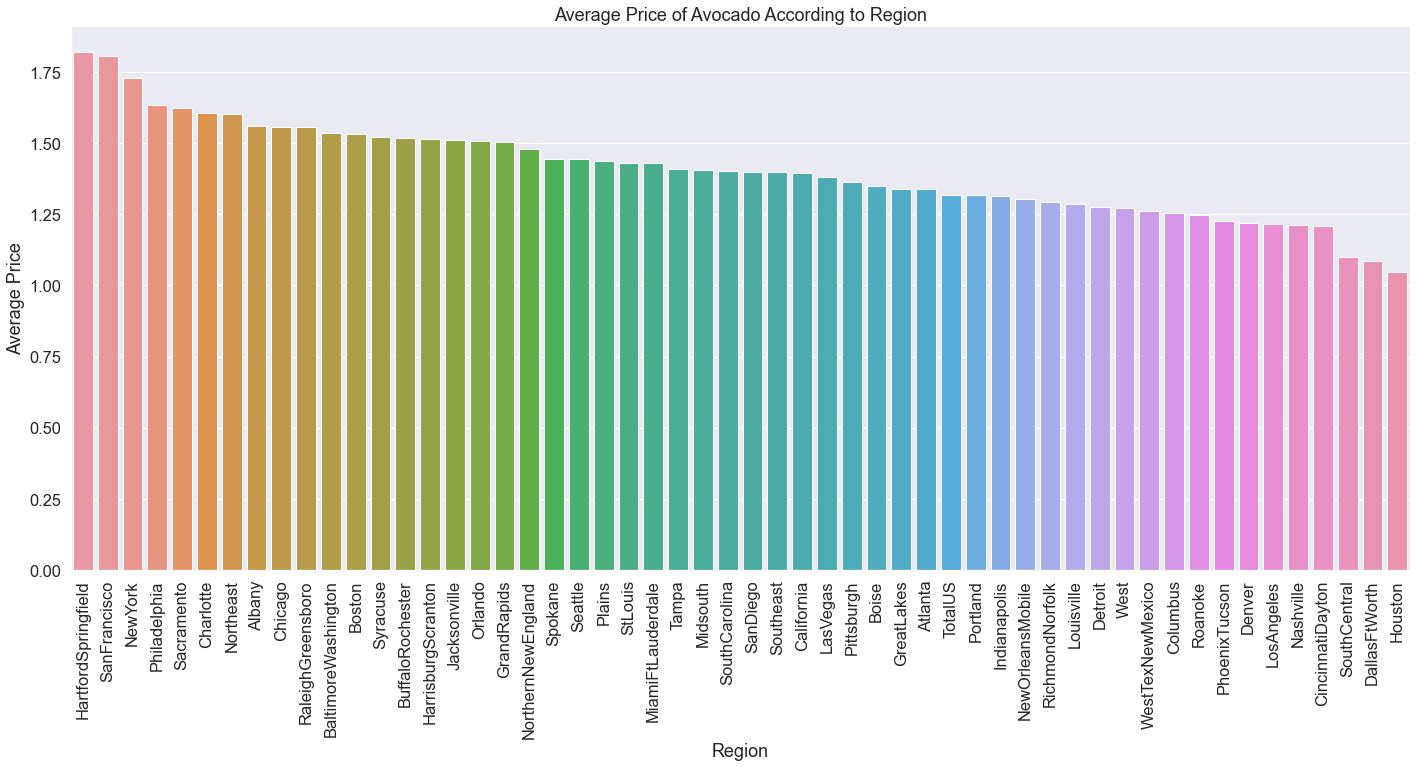

In [440]:
#TOP 5 regions where Average price are very high

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

#### Looks like these region are where price is very high
1. HartfordSpringfield
2. SanFrancisco
3. NewYork
4. Philadelphia
5. Sacramento

Text(0.5, 1.0, 'Average of Total Volume According to Region')

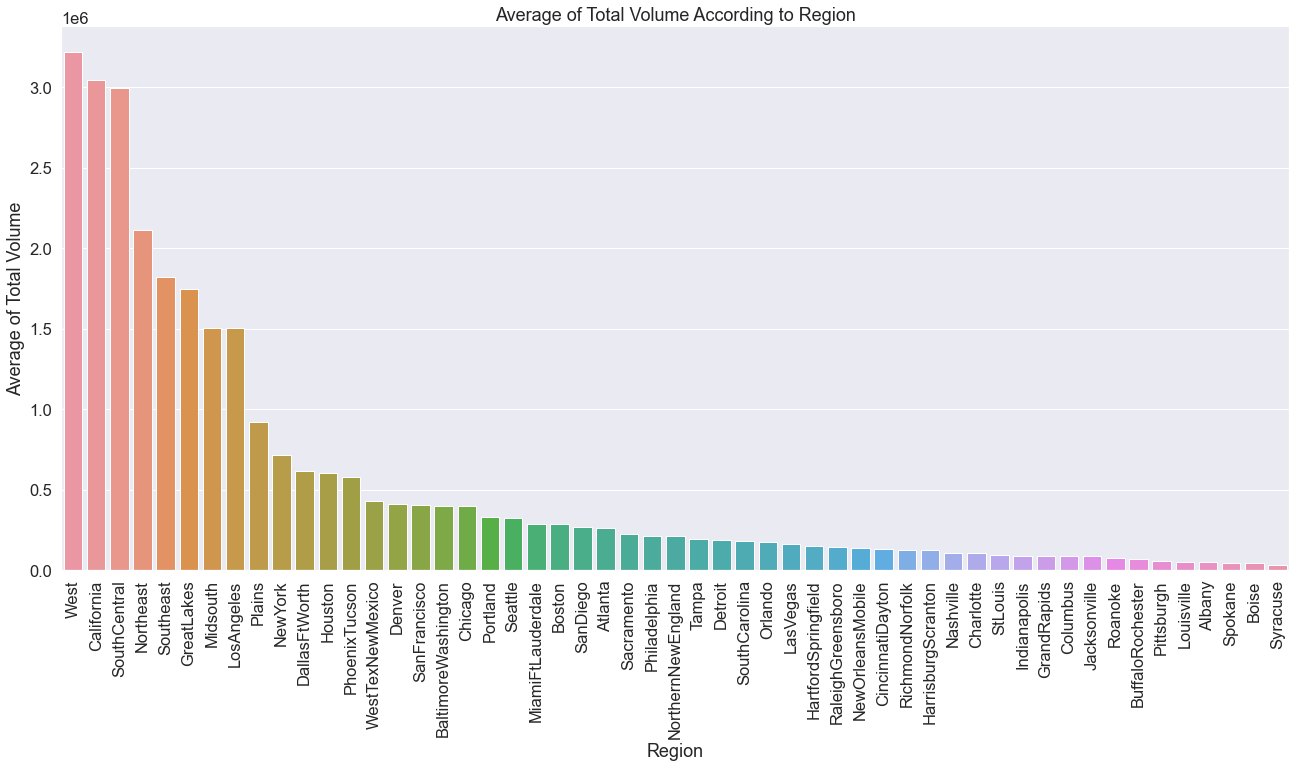

In [441]:
 # TOP 5 regions where Average consumption is very high
    
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

#### Below mentioned region are where Consumption is very high
1. West
2. California
3. SouthCentral
4. Northeast
5. Southeast

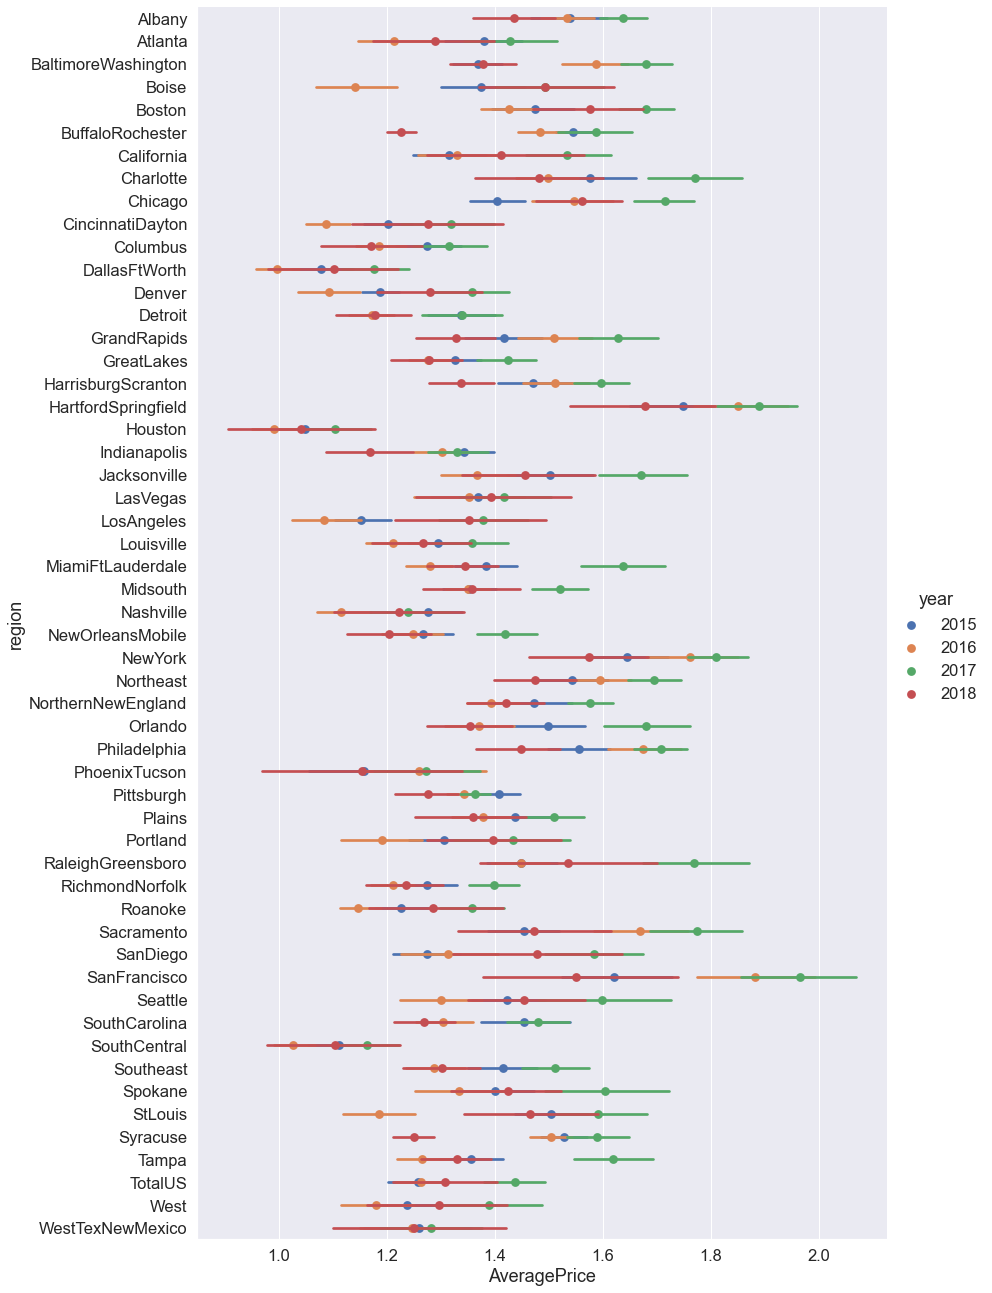

In [442]:
# The year and region for which the Average price the highest

g = sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   join=False,
              )

#### We can see that, there was a huge increase in Avocado prices as the demand was little high in Year 2017 in SanFranciso region. 

# EDA Concluding Remarks

1. Continous columns have skewness
2. Spike in average price in the year 2017 as the demand was little high in SanFranciso region.
3. Price is very high in HartfordSpringfield Region.
4. Consumption is very high in West region 
5. If we think back to the box plot, we can see that Organic cost roughly 34% more than Conventional.
6. When looking over their average volume sold, we see that in 2019 Organic Avocados roughly sold 72,000-units, Conventional Avocados sold around 2,000,000-units. Taking these two averages, Organic Avocados sold roughly 186% more than Conventional.

7. After cleaning, compiling, and organizing the relevant datasets we can see that Organic Avocados are consistently more expensive than Conventional Avocados. Conversely, we see that Conventional Avocados have a higher average volume sold than Organic.�These results pose an inverse relationship between cost and units sold ultimately suggesting that the lower cost leads to higher sales.

# Outliers Detection

<AxesSubplot:>

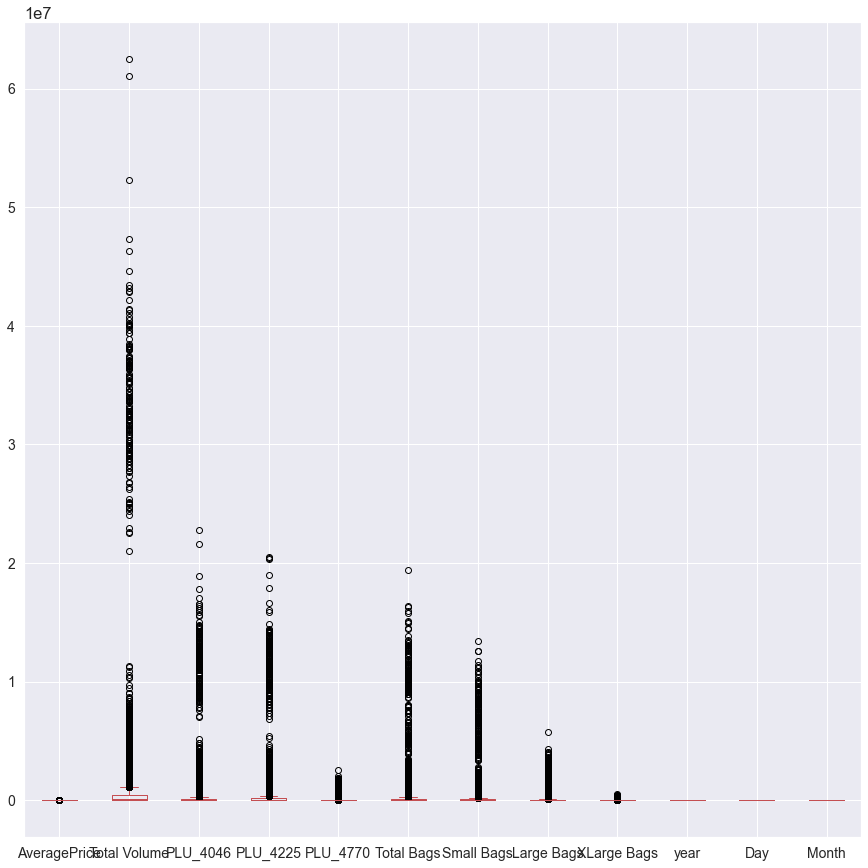

In [443]:
df.plot(kind='box',fontsize=14,figsize=(15,15),color='r')

#### There are outliers in all the columns except year,month,day and as they are  categorical no need to check outliers for these columns.

#### And in all other columns we can see a huge number of outliers.

### Removing Outliers using Z score Method

In [444]:
#Features having outliers
features=df[['Total Volume','PLU_4046','PLU_4225','PLU_4770','Total Bags','Small Bags','Large Bags','XLarge Bags']]

In [445]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


#### Removed the outliers using zscore method.

In [446]:
#Checking shape of new dataset
df_new.shape

(17782, 14)

In [447]:
#checking the old dataset
df.shape

(18249, 14)

In [448]:
#Checking dataloss
Dataloss = (((18249-17782)/18249)*100)
Dataloss

2.55904433119623

#### Using Zscore,2.56% data loss.Which is less than 10%

# Skewness:

In [449]:
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
PLU_4046        4.928850
PLU_4225        4.472729
PLU_4770        5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

#### We can notice skewness in almost all columns except year, month and Day.

In [450]:
#list of skewed features

skew_fea=["Total Volume","PLU_4046","PLU_4225","PLU_4770","Total Bags","Small Bags","Large Bags","XLarge Bags"]

# Taking all the columns with skewness as a list with variable skew_fea.

In [451]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [452]:
#Removing skewness using yeo-johnson
df_new[skew_fea] = scaler.fit_transform(df_new[skew_fea].values)


#Removing skewness in H using log1p
df_new["XLarge Bags"]=np.log1p(df_new["XLarge Bags"])

In [453]:
#Checking skewness after removing skewness
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
PLU_4046       -0.038259
PLU_4225       -0.043246
PLU_4770        0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

#### Skewness removed

# Encoding:

In [454]:
# encoding for "Type"
dummy = pd.get_dummies(df_new[['type']],drop_first = False)
df_new = df_new.join(dummy)
df_new.drop(columns = ['type'],inplace=True)

# Encoding 'region' using Label Encoder

from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()
df_new.region = labenc.fit_transform(df_new.region)



In [455]:
df = df_new

In [456]:
df.head()

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.126094,2015,0,27,12,1,0
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.126094,2015,0,20,12,1,0
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.126094,2015,0,13,12,1,0
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.126094,2015,0,6,12,1,0
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.126094,2015,0,29,11,1,0


# Correlation using heat map:

In [457]:
cor=df.corr()
cor

,AveragePrice,Total Volume,PLU_4046,PLU_4225,PLU_4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.392262,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.629752,0.076584,0.065709,-0.006248,-0.026332,0.800828,-0.800828
PLU_4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.575152,-0.002396,0.159390,-0.004558,-0.025919,0.725826,-0.725826
PLU_4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.583293,-0.004533,0.032273,-0.005919,-0.024708,0.747722,-0.747722
PLU_4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.617192,-0.051657,0.037805,0.001383,-0.017377,0.780988,-0.780988
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.612530,0.210924,0.065996,-0.003703,-0.014571,0.725686,-0.725686
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.601404,0.185955,0.051985,-0.000535,-0.010260,0.720466,-0.720466
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.451796,0.190295,0.086573,-0.000876,-0.016942,0.500026,-0.500026
XLarge Bags,-0.392262,0.629752,0.575152,0.583293,0.617192,0.612530,0.601404,0.451796,1.000000,0.156202,-0.017598,0.010991,0.020885,0.672461,-0.672461
year,0.099910,0.076584,-0.002396,-0.004533,-0.051657,0.210924,0.185955,0.190295,0.156202,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399


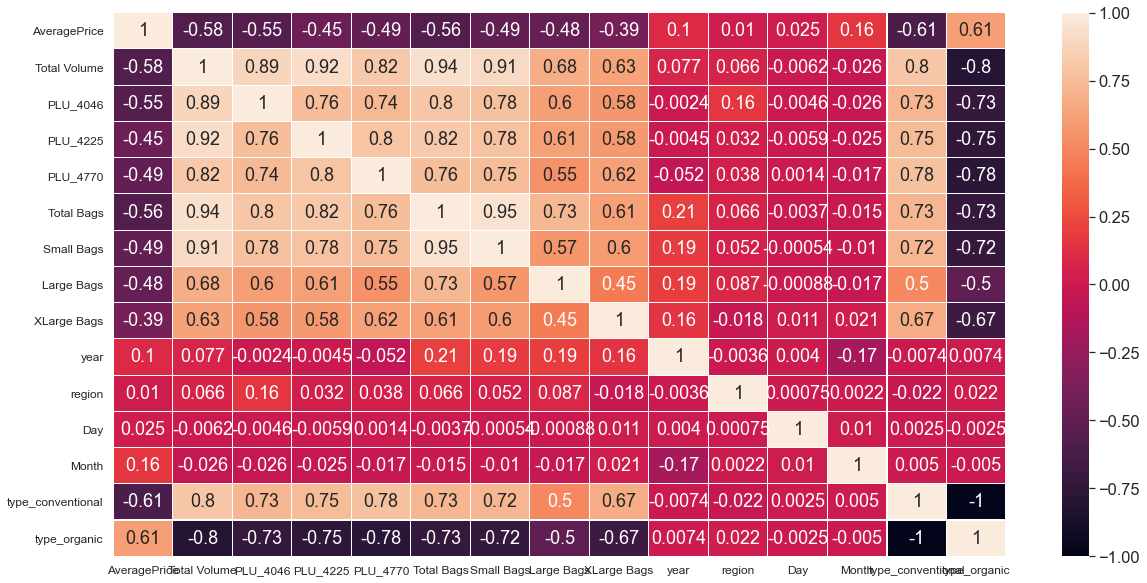

In [458]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

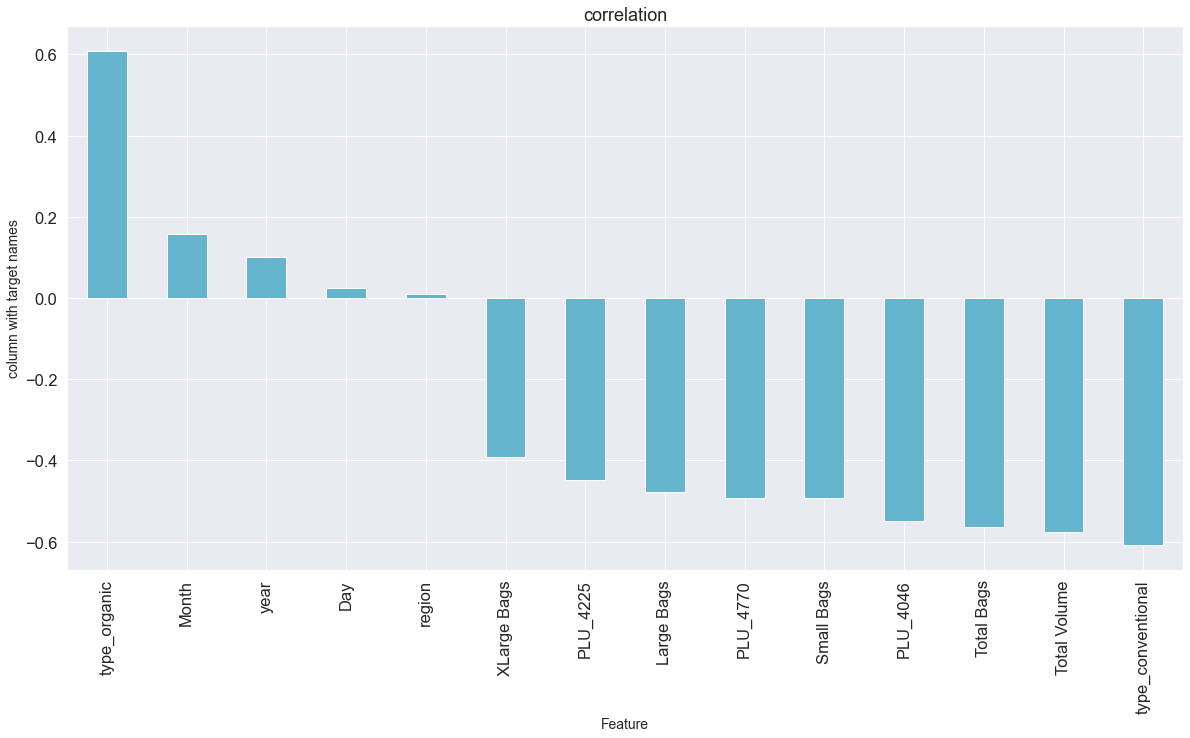

In [459]:
plt.figure(figsize=(20,10))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

#### We can be observed that 'type_organic' has the highest positive correlation with 'AveragePrice', 'type_conventional' has the highest negative correlation while 'region' has the weakest correlation.

# Preprocessing Pipeline

# Feature Selection

In [460]:
from sklearn.preprocessing import StandardScaler
X =df.drop(columns=['AveragePrice'])
y =df['AveragePrice']
scaler= StandardScaler()

In [461]:
scaled_X = scaler.fit_transform(X)

## Checking for Multicollinearity using Variance Inflation Factor

In [462]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]
vif

,Features,vif
0,Total Volume,52.135153
1,PLU_4046,7.153503
2,PLU_4225,11.169208
3,PLU_4770,3.952932
4,Total Bags,34.511208
5,Small Bags,16.637834
6,Large Bags,3.463222
7,XLarge Bags,2.071603
8,year,1.386262
9,region,1.085394


#### There is no multicollinearity

## Selecting Kbest Features

In [463]:
from sklearn.feature_selection import SelectKBest, f_classif

bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

              Feature      Score
13       type_organic  49.966168
12  type_conventional  49.966168
0        Total Volume  39.927250
1            PLU_4046  36.480181
4          Total Bags  35.879124
3            PLU_4770  27.651101
5          Small Bags  25.039951
6          Large Bags  23.354747
2            PLU_4225  21.772853
7         XLarge Bags  15.635424
8                year   3.163539
11              Month   2.850599
9              region   1.291093
10                Day   1.249095


In [464]:
# Selecting the best features based on scores above

xbest = X.drop(columns=['region','Day','Total Volume','Total Bags' ])
xbest

,PLU_4046,PLU_4225,PLU_4770,Small Bags,Large Bags,XLarge Bags,year,Month,type_conventional,type_organic
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-1.126094,2015,12,1,0
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-1.126094,2015,12,1,0
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-1.126094,2015,12,1,0
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-1.126094,2015,12,1,0
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-1.126094,2015,11,1,0
...,...,...,...,...,...,...,...,...,...,...
18244,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-1.126094,2018,2,0,1
18245,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-1.126094,2018,1,0,1
18246,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-1.126094,2018,1,0,1
18247,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-1.126094,2018,1,0,1


In [465]:
xbest_ss = scaler.fit_transform(xbest) #Scaling features using Standard Scaler

#### The Data to be predicted in Target / Label column is continuous in nature since it is the Average Price. Therefore Regression Models will be used.

# Building Machine Learning Models

## Regression Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Finding the Best Random State

from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")


## Train Test Split

In [467]:
x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state =11)

In [468]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Linear Regression

In [469]:
#checking r2 score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predLR))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predLR)))

R2_score: 0.5115919787180995
MAE: 0.22079207353412644
MSE: 0.07946578302098939
RMSE: 0.281896759507784


## Ridge Regressor

In [470]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
paramsRidge = {'alpha':[0.01,0.1,1.0,10.26],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
ridge = Ridge()
clf = GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.01, 'solver': 'saga'}


In [471]:
#checking r2 score for Ridge
ridge = Ridge(alpha=10.26,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge = ridge.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,pred_ridge))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,pred_ridge))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,pred_ridge))

# Root Mean Squared Error
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,pred_ridge)))

R2_score: 0.5115943412234344
MAE: 0.22078182739636693
MSE: 0.0794653986326744
RMSE: 0.2818960777177902


## Random Forest Regression Model

In [472]:
#checking r2 score for Random Forest Regression
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predrf))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predrf))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predrf))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predrf)))

R2_score: 0.8720455685437251
MAE: 0.10219062872721077
MSE: 0.02081865703186233
RMSE: 0.14428671814086816


## XGB Regression Model

In [473]:
#checking r2 score for XGB Regression
xg = XGBRegressor()
xg.fit(x_train,y_train)
predxg = xg.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predxg))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predxg))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predxg))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predxg)))

R2_score: 0.8555557182982444
MAE: 0.11174330987989609
MSE: 0.023501616370279192
RMSE: 0.15330236909545525


## Support Vector Regression Model

In [474]:
#checking r2 score for XGB Regression
sv = SVR()
sv.fit(x_train,y_train)
predsv = sv.predict(x_test)
# R2_Score
print("R2_score:",r2_score(y_test,predsv))

# Mean Absolute Error (MAE)
print("MAE:",metrics.mean_absolute_error(y_test,predsv))

#Mean Squared Error (MSE)
print("MSE:",metrics.mean_squared_error(y_test,predsv))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predsv)))

R2_score: 0.7753476026145891
MAE: 0.14113068761024708
MSE: 0.036551772059186104
RMSE: 0.19118517740448945


## Checking for Cross Validation Score

In [475]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

# Checking CV score for LinearRegression
print("CV score for LinearRegression:", cross_val_score(LR,xbest_ss,y,cv=ShuffleSplit(5)).mean())

# Checking CV score for Ridge Regression
print("CV score for Ridge Regression:", cross_val_score(ridge,xbest_ss,y,cv=ShuffleSplit(5)).mean())

# Checking CV score for Random Forest Regression
print("CV score for Random Forest Regression:",cross_val_score(rf,xbest_ss,y,cv=ShuffleSplit(5)).mean())

# Checking CV score for XGB Regression
print("CV score for XGB Regression:",cross_val_score(xg,xbest_ss,y,cv=ShuffleSplit(5)).mean())

# Checking CV score forSupport Vector Regression 
print("CV score for Support Vector Regression :",cross_val_score(sv,xbest_ss,y,cv=ShuffleSplit(5)).mean())

CV score for LinearRegression: 0.5144061678406775
CV score for Ridge Regression: 0.5023133870059436
CV score for Random Forest Regression: 0.8737242197048086
CV score for XGB Regression: 0.8562746985830263
CV score for Support Vector Regression : 0.7756636877775376


#### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

In [476]:
# Random Forest Regressor
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [ ]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [ ]:
# GridCV.fit(x_train,y_train)

In [ ]:
# GridCV.best_params_

In [ ]:
Best_mod_Reg = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 10)
Best_mod_Reg.fit(x_train,y_train)

In [ ]:
rfpred = Best_mod_Reg.predict(x_test)
acc = r2_score(y_test,predrf)
print(acc*100)

# Save The Regression Model

In [ ]:
import joblib
joblib.dump(Best_mod_Reg,"Avocado_Regression.pkl")

# Load The Regression Model

In [ ]:
mod=joblib.load("Avocado_Regression.pkl")
print(mod.predict(x_test))

In [ ]:
# Plot the Prediction

plt.figure(figsize=(10,10))
plt.scatter(y_test, predrf, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(predrf), max(y_test))
p2 = min(min(predrf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

![reg](https://c.tenor.com/-UvN55IoPuwAAAAM/dance-avocado.gif)

# The dataset can be seen in two angles to find the region and find the average price, We already did the "Average Price", now let's find the "Region".

# Classification Model Building

# Preprocessing Pipeline

### Train Test Split

In [ ]:
x_c = df.drop(columns=['region','Date','Total Volume','Total Bags'])
y_c = df['region']
print(x_c.shape)
print(y_c.shape)

### Data Standardization

In [ ]:
# standardize the value of x, to normally distribute the data

sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

## Now, "Region" is the output variable, and will predict using classification method

In [ ]:
x_c.info()

# Building Machine Learning Model

In [ ]:
df = df.astype(int)

In [ ]:
model = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]
max_acc = 0
for r in range(40,55):
    x_train,x_test,y_train,y_test = train_test_split(x_c,y_c,test_size = .33, random_state = r)
    for i in model:
        i.fit(x_train,y_train)
        pre = i.predict(x_test)
        acc= accuracy_score(y_test,pre)
        print("accuracy is :", acc, "at random state:", r)
        if acc> max_acc:
            max_acc = acc
            rand= r
            mod = i
print("Maximum accuracy is :", max_acc, "at random state:", rand, "and model is:", mod)

In [ ]:
# Best Parameter for prediction of RandomForestClassifier Algo using Grid Search CV

x_train,x_test,y_train,y_test = train_test_split(x_c,y_c,test_size = .33, random_state = 50)
rfc=RandomForestClassifier(random_state=50)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

In [ ]:
CV_rfc.best_params_

In [388]:
rfc1=RandomForestClassifier(random_state=50, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [389]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=50)

In [390]:
pred=rfc1.predict(x_test)

In [392]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.7556653603680354


In [ ]:
# calculating the scores 
score = cross_val_score(rfc1,x_c,y_c,cv=100,scoring="accuracy").mean()
print("Cross Validation Score: ", score*100)
print("Mean Score :", score.mean()*100)
print("STD Score:", score.std())

#### By using the GridSeachCV, we are able to find the best param and then find the best accuracy score that is 75%

### Roc Curve:

In [396]:
pred_prob = rfc1.predict_proba(x_test)[:,1]
pred_prob

array([0.04719782, 0.12002937, 0.00539733, ..., 0.00553236, 0.00374093,
       0.00868178])

In [397]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

In [398]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.73761946e-04
 1.73761946e-04 8.68809731e-04 8.68809731e-04 1.21633362e-03
 1.21633362e-03 1.73761946e-03 1.73761946e-03 1.91138141e-03
 1.91138141e-03 2.25890530e-03 2.25890530e-03 2.78019114e-03
 2.78019114e-03 3.99652476e-03 3.99652476e-03 6.08166811e-03
 6.08166811e-03 7.64552563e-03 7.64552563e-03 8.51433536e-03
 8.51433536e-03 1.42484796e-02 1.42484796e-02 2.39791486e-02
 2.39791486e-02 2.79756733e-02 2.79756733e-02 2.95395308e-02
 2.95395308e-02 3.00608167e-02 3.00608167e-02 3.12771503e-02
 3.12771503e-02 3.19721981e-02 3.19721981e-02 3.30147698e-02
 3.30147698e-02 3.57949609e-02 3.57949609e-02 3.84013901e-02
 3.84013901e-02 3.97914857e-02 3.97914857e-02 4.06602954e-02
 4.06602954e-02 4.29192007e-02 4.29192007e-02 4.39617724e-02
 4.39617724e-02 4.43092963e-02 4.43092963e-02 4.44830582e-02
 4.44830582e-02 4.50043440e-02 4.50043440e-02 4.51781060e-02
 4.51781060e-02 4.58731538e-02 4.58731538e-02 4.65682016e-02
 4.65682016e-02 4.674196

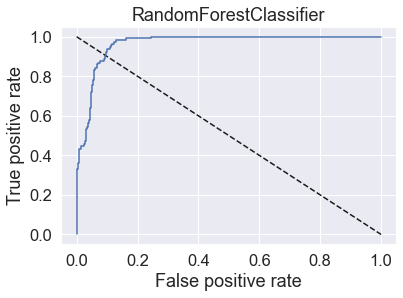

In [399]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()


As from this data set we have following conclusion:

    - taking price as y variable is predicting well for this model as comapared to region
    - also r2 score value is also greater then accuracy score

# Save the Classification model

In [400]:
joblib.dump(rfc1, 'Avocado_class.pkl')

['Avocado_class.pkl']

# Load the Classification model

In [401]:
mod=joblib.load("Avocado_class.pkl")
print(mod.predict(x_test))

[ 1 50  0 ...  5 40 46]


# Concluding Remarks

- In addition, the score value of R2 is also greater than the accuracy score.
- The average price, the total exchanges and the total volume are well distributed among all the other columns
- There are no outliers in the dataset after replacing it with the mean value.
- Since year is the most negatively correlated column of all columns
- Between August and October the price of avocado is much higher compared to other months.
- Hartford Springfield, San Francisco and New York are having more average price as compared to another region
- As organic type of avocado is having the more price per unit then conventional
- I had done prediction using region and price but using price the prediction score is high as compared to region
- So in this data set we are using both regression and classification technique for making this model

![avo](https://c.tenor.com/g9oUSHTZZfAAAAAC/avocado-dancing.gif)